In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
columns = ['duration',
                'protocol_type',
                'service',
                'flag',
                'src_bytes',
                'dst_bytes',
                'land',
                'wrong_fragment',
                'urgent',
                'hot',
                'num_failed_logins',
                'logged_in',
                'num_compromised',
                'root_shell',
                'su_attempted',
                'num_root',
                'num_file_creations',
                'num_shells',
                'num_access_files',
                'num_outbound_cmds',
                'is_host_login',
                'is_guest_login',
                'count',
                'srv_count',
                'serror_rate',
                'srv_serror_rate',
                'rerror_rate',
                'srv_rerror_rate',
                'same_srv_rate',
                'diff_srv_rate',
                'srv_diff_host_rate',
                'dst_host_count',
                'dst_host_srv_count',
                'dst_host_same_srv_rate',
                'dst_host_diff_srv_rate',
                'dst_host_same_src_port_rate',
                'dst_host_srv_diff_host_rate',
                'dst_host_serror_rate',
                'dst_host_srv_serror_rate',
                'dst_host_rerror_rate',
                'dst_host_srv_rerror_rate',
                'intrusion_type'
               ]

df = pd.read_csv('dataset/dataset.csv', names=columns)
df.to_csv('data.csv', header=True, index=False)

In [6]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,intrusion_type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
df['status'] = 'non-threat'
df['status'].loc[df.intrusion_type != 'normal.'] = 'threat'

C:\Users\AnshulRanade\AppData\Local\Temp\ipykernel_10728\578299239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'].loc[df.intrusion_type != 'normal.'] = 'threat'


In [6]:
df['land'] = df['land'].astype('object')
df['logged_in'] = df['logged_in'].astype('object')
df['is_host_login'] = df['is_host_login'].astype('object')
df['is_guest_login'] = df['is_guest_login'].astype('object')

In [7]:
X = df.drop(['intrusion_type', 'status'], axis=1)
y = df['status']

In [8]:
X.shape

(494021, 41)

In [9]:
X_transformed = pd.get_dummies(X, drop_first=True)

C:\Users\AnshulRanade\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [10]:
X_transformed.shape

(494021, 114)

In [11]:
from sklearn.preprocessing import StandardScaler

X_transformed_scaled = StandardScaler().fit_transform(X_transformed)

In [12]:
from sklearn.decomposition import PCA


In [13]:
pca = PCA()

pca_data = pca.fit_transform(X_transformed_scaled)

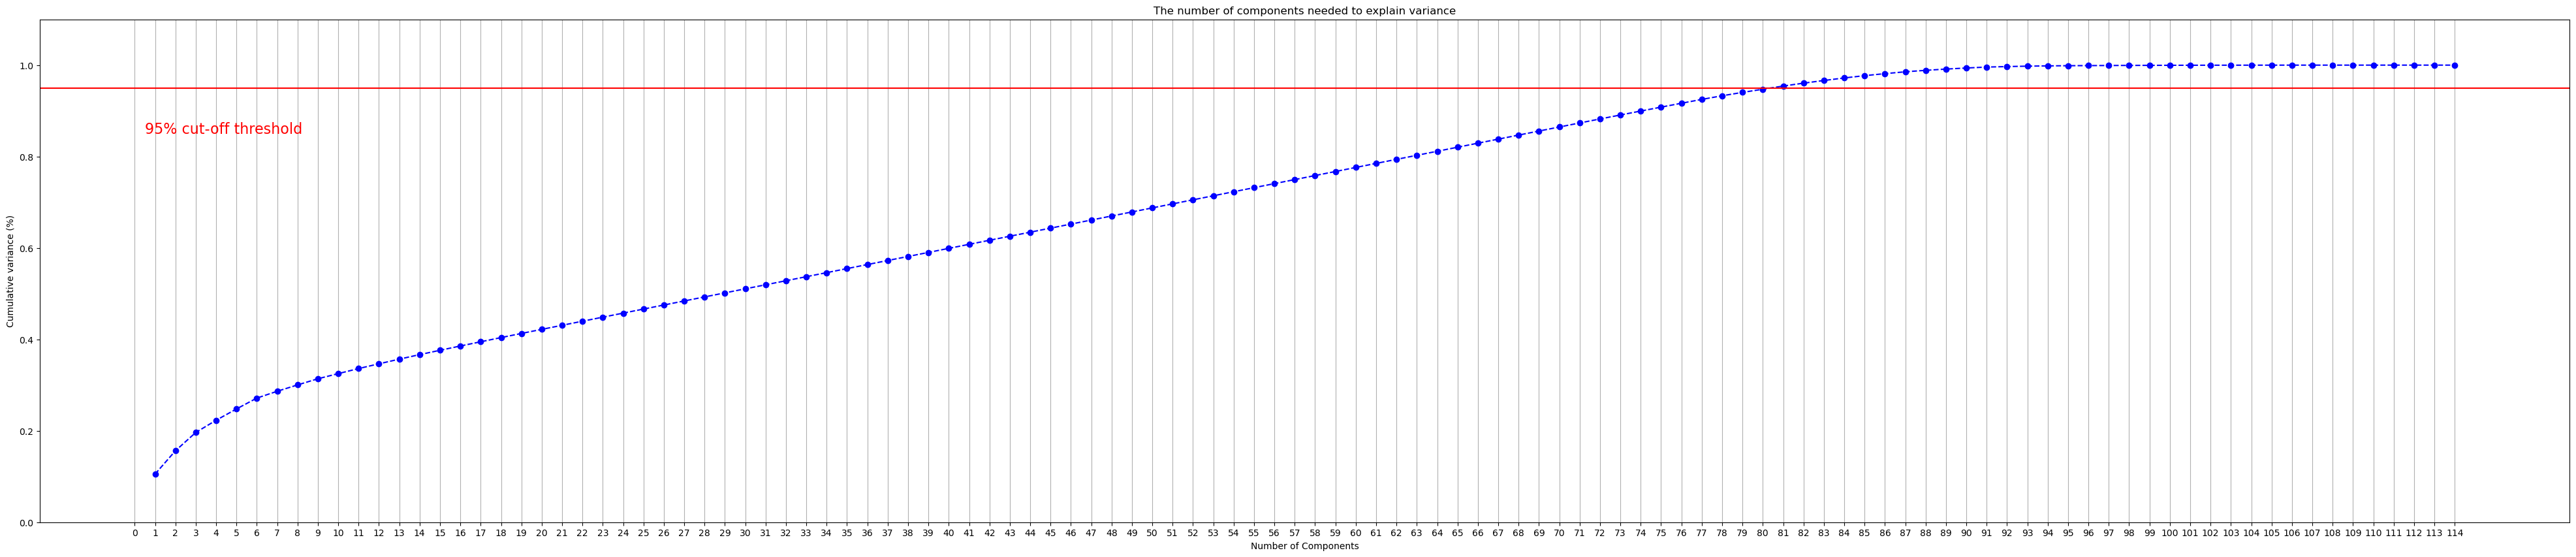

In [14]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (50, 10)

fig, ax = plt.subplots()
xi = np.arange(1, 115, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 115, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [15]:
y[y == 'threat'] = 1
y[y == 'non-threat'] = 0

C:\Users\AnshulRanade\AppData\Local\Temp\ipykernel_10728\3407744544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'threat'] = 1
C:\Users\AnshulRanade\AppData\Local\Temp\ipykernel_10728\3407744544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'non-threat'] = 0


In [16]:
y.shape

(494021,)

In [17]:
y = y.astype('int')

In [18]:
pca2 = PCA(n_components=81)

pca_data2 = pca2.fit_transform(X_transformed_scaled)

In [19]:
pca_data2.shape

(494021, 81)

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(pca_data2, y, test_size=0.6)

In [33]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(x_train, y_train)


C:\Users\AnshulRanade\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_preds = lr.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score, f1_score

In [36]:
accuracy_score(y_preds, y_test)

0.9912217075499388

In [37]:
f1_score(y_preds, y_test)

0.9945252172449344

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [39]:
y_preds_dt = dt.predict(x_test)

In [40]:
accuracy_score(y_preds_dt, y_test)

0.9992814080354101

In [41]:
f1_score(y_preds_dt, y_test)

0.999552920186808